<a href="https://colab.research.google.com/github/dhruvd0/zomato_roulette/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zomato Data Analysis



## Description
We are going to be using Zomato dataset available on Kaggle. Link for the same is attached [here](https://https://www.kaggle.com/midouazerty/restaurant-recommendation-system-using-ml/data?select=zomato.csv). 
<br>
To use the notebook, mount the Google Drive and save the CSV file to a drive folder. Then, copy the path to the address location.

## Data Cleaning

Importing all the necessary libraries for the CSV Analysis.

In [5]:




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Datasets/Zomato Analysis/zomato.csv')

In [7]:

print(df.shape)

df.head()

(51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
unused_col= ['url', 'address', 'phone', 'dish_liked', 'menu_item']
df= df.drop(unused_col, axis=1)

In [9]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
df = df.rename(columns={'approx_cost(for two people)':'approx_cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost', 'reviews_list', 'type', 'city'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   reviews_list  51717 non-null  object
 10  type          51717 non-null  object
 11  city          51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


In [12]:
df.describe() 

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [13]:
duplicate=df[df.duplicated()] 
duplicate

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,reviews_list,type,city
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...",Dine-out,Banashankari
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,"[('Rated 4.0', 'RATED\n It was yesterday I vi...",Dine-out,Bannerghatta Road
4339,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,Biryani,400,[],Delivery,Bellandur
7599,Nawab Di Biryani,Yes,No,NEW,0,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400,"[('Rated 4.0', 'RATED\n Ordered paneer tikka ...",Delivery,Brookefield
9342,Healthy Parathawala,Yes,No,NEW,0,BTM,Quick Bites,North Indian,200,[],Delivery,BTM
...,...,...,...,...,...,...,...,...,...,...,...,...
46553,House Of Candy,Yes,No,NaN,0,Malleshwaram,Confectionery,Desserts,200,[],Delivery,Rajajinagar
49193,Sri Ganesh Juice Junction,Yes,No,3.5 /5,6,Bellandur,Beverage Shop,"Juices, Fast Food",200,"[('Rated 4.0', 'RATED\n A perfect place to dr...",Delivery,Sarjapur Road
49432,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,Biryani,400,[],Delivery,Sarjapur Road
50405,House Of Candy,Yes,No,NaN,0,Whitefield,Confectionery,Desserts,200,[],Delivery,Whitefield


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
# Removing '/5' from rate

def filter_rate(val):
    if (val=='-' or val=='NEW'):
        return np.nan
    else:
        val=str(val).split('/')[0] # e.g 4.3/5 -> ['4.3', '5'] -> float(4.3) -> 4.3
    return float(val)

df['rate']=df['rate'].apply(filter_rate)

df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51645, dtype: float64

In [17]:
# Unique values in approx_cost

df['approx_cost'].unique()


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [18]:
# Replace , with '' and converting its datatype to float


df['approx_cost']

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: approx_cost, Length: 51645, dtype: object

In [19]:
df.describe() 

,rate,votes
count,41622.000000,51645.000000
mean,3.700526,283.968555
std,0.440598,804.317863
min,1.800000,0.000000
25%,3.400000,7.000000
50%,3.700000,41.000000
75%,4.000000,198.000000
max,4.900000,16832.000000


In [20]:
df.tail() # last 5 rows in our dataset

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,reviews_list,type,city
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield
51716,The Nest - The Den Bengaluru,No,No,3.4,13,"ITPL Main Road, Whitefield","Bar, Casual Dining","Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",Pubs and bars,Whitefield


In [21]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10023
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       345
reviews_list        0
type                0
city                0
dtype: int64

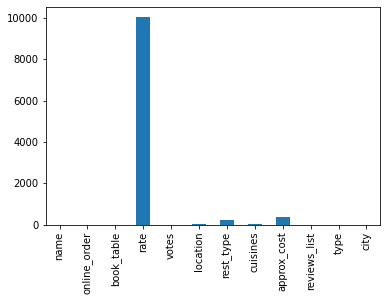

In [22]:
df.isnull().sum().plot(kind='bar');

In [23]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
reviews_list    0
type            0
city            0
dtype: int64

In [26]:
df["cuisines"]

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51077, dtype: object

In [27]:
df['Number_of_cuisines_offered'] = df['cuisines'].apply(lambda x : len(x.split(',')))

## Data Visualization

In [28]:
plt.style.use('seaborn') # adding some styling to our plots 

In [29]:
df["location"] 

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51077, dtype: object

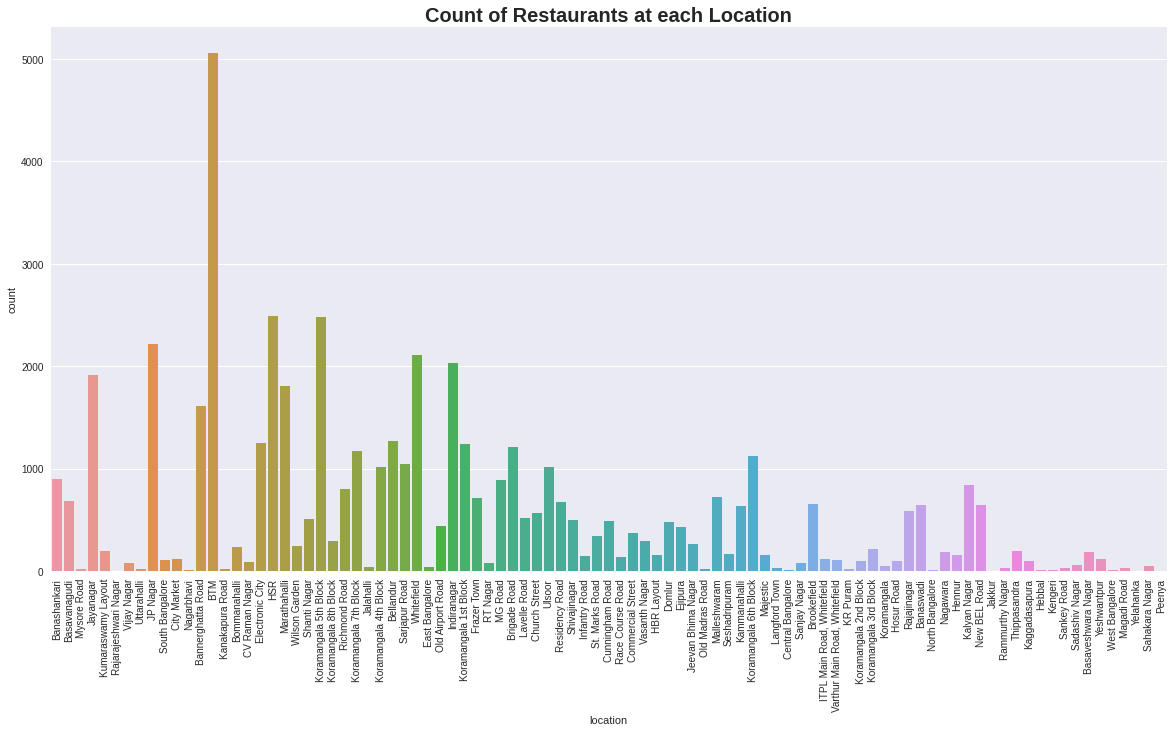

In [30]:
# Countplot of location

plt.figure(figsize=(20,10))
sns.countplot(x='location', data=df)
plt.title('Count of Restaurants at each Location', fontsize=20, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [31]:
print("location \t\t count")
df["location"].value_counts()

location 		 count


BTM                      5056
HSR                      2495
Koramangala 5th Block    2480
JP Nagar                 2218
Whitefield               2106
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [32]:
df["rest_type"] 

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51077, dtype: object

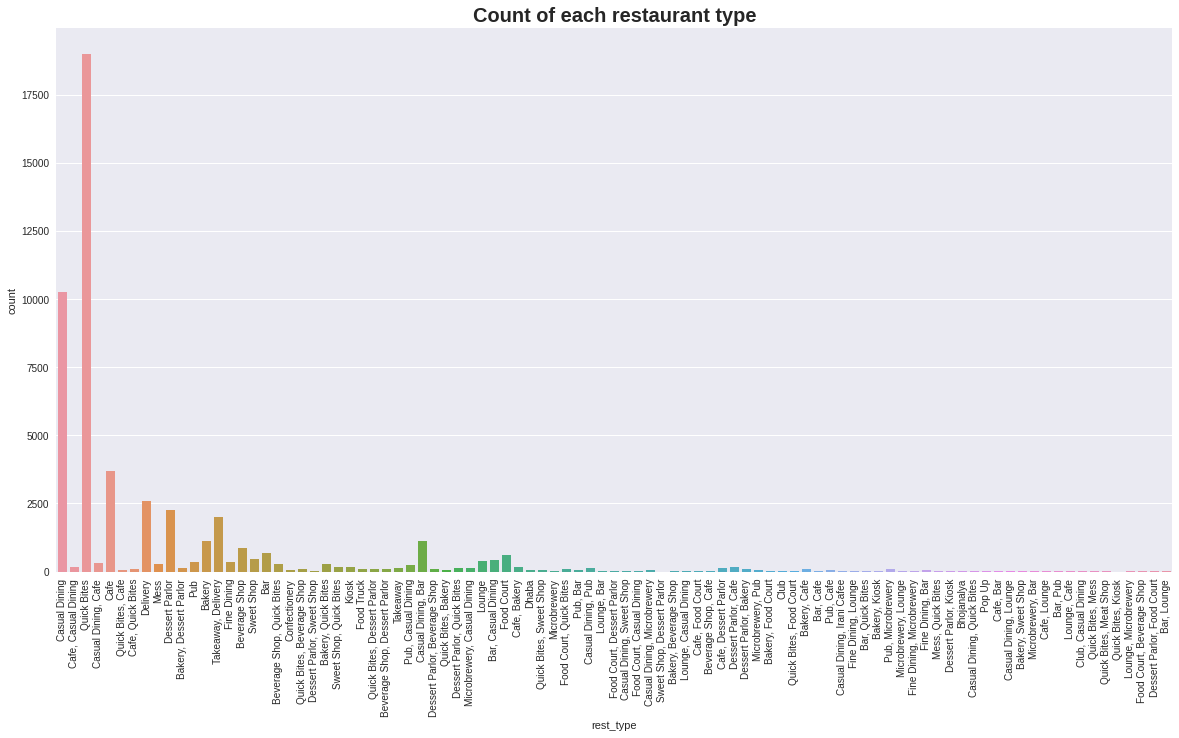

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x='rest_type', data=df)
plt.xticks(rotation=90)
plt.title('Count of each restaurant type', fontsize=20, fontweight='bold')
plt.show()

In [34]:
print("rest_type\t\t\tcount")
df["rest_type"].value_counts()

rest_type			count


Quick Bites                   19015
Casual Dining                 10259
Cafe                           3685
Delivery                       2574
Dessert Parlor                 2243
                              ...  
Bakery, Food Court                2
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [35]:
# Grouping by number of cuisines offered and finding the mean of approx_cost for each cuisine 
a = df.groupby('Number_of_cuisines_offered').agg({'approx_cost':'mean'}).astype(float)
plt.rcParams["figure.figsize"] = (12,8)
a.plot(kind='bar', color='#7952B3')
plt.title('Approx cost based on Number of cuisines', fontsize=20, fontweight='bold')
plt.ylabel('approx mean cost')
plt.legend()
plt.show()

DataError: ignored

In [ ]:
print("no\tcount")

df['Number_of_cuisines_offered'].value_counts()

In [ ]:
# Grouping by number of cuisines offered and finding the mean of approx_cost for each cuisine 
a = df.groupby('Number_of_cuisines_offered').agg({'rate':'mean'})
plt.rcParams["figure.figsize"] = (12,8)
a.plot(kind='bar', color='#7952B3')
plt.title('Average ratings based on number of cuisines offered', fontsize=20, fontweight='bold')
plt.ylabel('average ratings')
plt.legend()
plt.show()



In [ ]:
df["name"] 

In [ ]:
plt.figure(figsize=(15,7))
chains = df['name'].value_counts()[:20]
sns.barplot(x=chains, y=chains.index, palette='Set1')
plt.xlabel("Number of outlets", size=15)
plt.ylabel("Name of Restaurants", size=15)
plt.title("Most famous restaurant chains", fontsize=20, fontweight='bold')
plt.show()


In [ ]:
df_online_booking = df.groupby(["online_order", "book_table"]).size().reset_index(name = "Count")
plt.figure(figsize = (15,7))
sns.barplot(x="online_order", y="Count", hue="book_table", data=df_online_booking)
plt.title("Online Order - Book Table", fontsize=20, fontweight='bold')
plt.show()

In [ ]:
label1 = ["Accepted",'Not Accepted']
label2 = ['Not Accepted', "Accepted"]

df_online = df['online_order'].value_counts().values
df_table = df['book_table'].value_counts().values

fig, ax1 = plt.subplots(nrows=1, ncols=2)

color1 = ['#FA744F', '#16817A']
color2 = ['#FC5050', '#FFD00C']

ax1[0].pie(df_online, labels=label1, autopct='%1.1f%%', startangle=90, colors=color1)
ax1[0].set_title('Online order', fontsize=20, fontweight='bold')

ax1[1].pie(df_table, labels=label2, autopct='%1.1f%%', startangle=90, colors=color2)
ax1[1].set_title('Book table', fontsize=20, fontweight='bold')
plt.show()

In [ ]:
# 15 most popular cuisines in Bangalore

plt.figure(figsize=(10,8))
df_cuisines = df['cuisines'].value_counts()[:15]
sns.barplot(x = df_cuisines.values, y=df_cuisines.index)
plt.title('Most popular cuisines in Bangalore', fontsize=20, fontweight='bold')
plt.show()

In [ ]:
# Plot Correlation Matrix

corr = df.corr()
corr.style.background_gradient(cmap='plasma').set_precision(2)

In [ ]:
pip install nltk

# Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')
zomato_real=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Datasets/Zomato Analysis/zomato.csv")
zomato_real.head()

Mounted at /content/drive


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
#Deleting Unnnecessary Columns
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)

#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})

#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float)
#Removing '/5' from Rates
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

## Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
## Lower Casing
zomato["reviews_list"] = zomato["reviews_list"].str.lower()

## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))

## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_stopwords(text))

## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))

zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
33367,rated 35 ratedn checked dinner quality food li...,"North Indian, Fast Food, Desserts, Beverages"
36744,rated 40 ratedn service 45 taste 45 ambience 5...,"Continental, North Indian, Finger Food"
25281,rated 30 ratedn went drinks pretty average not...,"Continental, North Indian, Chinese"
39121,rated 50 ratedn food excellent must try lookin...,North Indian
11819,rated 50 ratedn years back going foodhall indi...,"Italian, Bakery, Fast Food"


In [6]:
# RESTAURANT NAMES:
restaurant_names = list(zomato['name'].unique())
def get_top_words(column, top_nu_of_words, nu_of_word):
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    bag_of_words = vec.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_nu_of_words]
    
zomato=zomato.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)
import pandas

# Randomly sample 60% of your dataframe
df_percent = zomato.sample(frac=0.5)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
df_percent.set_index('name', inplace=True)
indices = pd.Series(df_percent.index)

# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

all_names = [zomato['name'][i] for i in range(len(zomato['name']))]

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
import json
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new.to_json(orient="index")


recommend("Pai Vihar")

# Deployment

In [14]:
!pip install flask_cors
!pip install markupsafe
!pip install flask_ngrok
from flask import Flask
from flask_ngrok import run_with_ngrok
from markupsafe import escape
from flask_cors import CORS

app = Flask(__name__)

CORS(app)
run_with_ngrok(app)




@app.route('/', methods=['GET'])
def index():
    
    return "Use recommend/<rest_name> to get recommendations"



@app.route('/recommend/<rest_name>', methods=['GET'])
def rec_api(rest_name):
    r_name = escape(rest_name)
    try:
      json = recommend(r_name)
      return (json)
    except ValueError:
      return rec_api(rest_name)
   





if __name__ == "__main__":
    app.run()
    


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://f93c-34-132-6-149.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Dec/2021 13:15:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2021 13:15:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Dec/2021 13:15:41] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [07/Dec/2021 13:15:48] "GET /recommend/Pai%20Vihar HTTP/1.1" 200 -


TOP 10 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 


127.0.0.1 - - [07/Dec/2021 13:15:49] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [07/Dec/2021 13:15:51] "GET /recommend/Pai%20Vihar HTTP/1.1" 200 -


TOP 10 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 


127.0.0.1 - - [07/Dec/2021 13:16:39] "GET //recommend/Pai%20Vihar HTTP/1.1" 200 -


TOP 10 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 


127.0.0.1 - - [07/Dec/2021 13:20:53] "GET //recommend/Pai%20Vihar HTTP/1.1" 200 -


TOP 10 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 


127.0.0.1 - - [07/Dec/2021 13:21:24] "GET //recommend/Pai%20Vihar HTTP/1.1" 200 -


TOP 10 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 
TOP 8 RESTAURANTS LIKE Green Pepper WITH SIMILAR REVIEWS: 


127.0.0.1 - - [07/Dec/2021 13:21:37] "GET //recommend/Green%20Pepper HTTP/1.1" 200 -


TOP 8 RESTAURANTS LIKE Green Pepper WITH SIMILAR REVIEWS: 
TOP 6 RESTAURANTS LIKE Green Pepper WITH SIMILAR REVIEWS: 


127.0.0.1 - - [07/Dec/2021 13:23:08] "GET //recommend/Pai%20Vihar HTTP/1.1" 200 -


TOP 10 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 
